# ** _pyOpTools_ ** __Tutorial__

*pyOpTools* is a set of *python* and *cython* packages that allow to create, manipulate and simulate optical systems.

Optical systems in *pyOptools* are build by serialization of optical components and by adding rays. Optical components at the same time are created by serialization of optical surfaces. Optical surfaces and rays are the basic classes in *pyOpTools*. Several methods to access and manipulate data, a variety of predefined optical components and a catalogue of lenses and optical materials en are included. 

The goal of this tutorial is to show how to create and display optical systems, how to perform basic simulations and how to access data. It is assumed that *pyOpTools* has been successfully installed.

In [2]:
from pyoptools.all import *

('Loading component library', 'Edmund', ' from files ', ['/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/pyoptools-0.1.1-py2.7-linux-x86_64.egg/pyoptools/raytrace/library/Edmund/SphOptics1.cmp', '/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/pyoptools-0.1.1-py2.7-linux-x86_64.egg/pyoptools/raytrace/library/Edmund/SphOptics.cmp'])


## Table of contents:

1. [Display 3D](#1)

2. [Optical surfaces](#2)
    
    2.1 [Plane surfaces](#21)
    
    2.2 [Spherical surfaces](#22)
    
    2.3 [Cylinders and cilyndrical surfaces](#23)
    
    2.4 [Aspheric surfaces](#24)
    
    2.5 [Diffraction grating](#25)

3. [From optical surfaces to optical components](#3)

    3.1 [Predefined optical components](#31)
    
    3.2 [Lenses](#32)
    
    3.3 [Mirrors, stops & sensors](#33)
    
    3.4 [Optical prisms & beamsplitters](#34)
    
4. [Optical systems](#4)

    4.1 [Optical systems without rays](#41)
    
    4.2 [Rays](#42)
    
    4.3 [Optical maps](#43)
    
    4.4 [Calcuations involving rays](#44)

5. [Applications](#5)


## 1. Display 3D <a class="anchor" id="1"></a>
To visualize any object created in *pyOpTools* and the raytracings the class *Plot3D* is used as follows:

```python
    Plot3D(Obj,center=(x,y,z),size=(a,b),rot=[(rx,ry,rz)],scale=s)
```

where: 

 $\quad$  *Obj* is the name of the optical element or system to be plotted
   
 $\quad$  *(x,y,z)* are the cartesian coordiantes of its center*
   
 $\quad$  *(a,b)* are the horizontal and vertical dimensions of the image
   
 $\quad$  *(rx,ry,rz)* are the rotation angles in radians around the axis x,y & z
   
 $\quad$ *s* is the scale of the image in the notebook.

>The y axis is pointing downwards and the z axis is pointing towards the screen.

<img style="float: left;width: 250px;" src="Repere.png">

## 2. Optical surfaces <a class="anchor" id="2"></a>

The elemental objects in *pyOpTools* are the optical surfaces. Optical components and optical systems are just arrangements of optical surfaces. An optical surface is charcterised by its shape, its curvature and its reflectivity and as any other objet it has a position and an orientation.

### 2.1 Plane surfaces <a class="anchor" id="2.1"></a>

Plane surfaces can be created as follows:

```python 
    P=Plane(shape=Shape(parameters=(,)),reflectivity=r)
```
__*Shape* can be either *Circular*, *Rectangular* or *Triangular* and the parameters can be the radius, the rectangular dimensions or the cartesian coordinates of the edges respectively.__
> See example 2.1



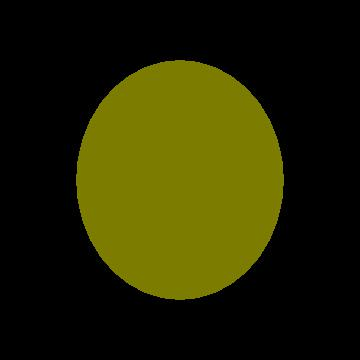

In [12]:
#Example 2.1 : Plane surfaces

P1=Plane(shape=Circular(radius=(20)),reflectivity=1)
P2=Plane(shape=Rectangular(size=(40,25)))
P3=Plane(shape=Triangular(coord=((-15,15),(5,-20),(18,12))))


Plot3D(P1,center=(0,0,0),size=(60,60),rot=[(0,-pi/6,0)],scale=6)


### 2.2 Spherical surfaces <a class="anchor" id="2.2"></a>

Shperical surfaces can be created as follows:

```python
        S=Spherical(curvature=c, shape=Shape(parameters=(,)),reflectivity=r)
```
*Shape* can be either *Circular* or *Rectangular*. The curvature c$=\frac{1}{R}$, where R is the radius of the sphere that generates the spherical surface.


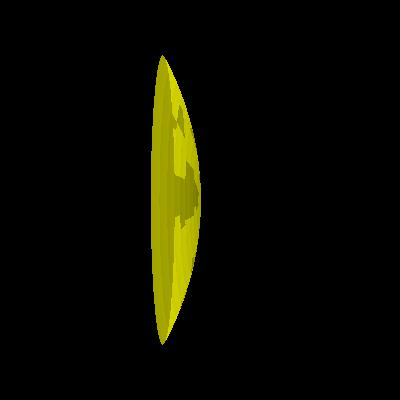

In [13]:
# Example 2.2: Spherical surface

S=Spherical(curvature=1/300., shape=Circular(radius=145.),reflectivity=1)

Plot3D(S,center=(0,0,0),size=(400,400),rot=[(0,-pi/1.9,0)],scale=1)

### 2.3 Cylinders and cylidrical surfaces <a class="anchor" id="2.3"></a>

Circular cylinders and portions of them with different shapes and curvatures can be created in *pyOpTools*

```python
     S=Cylindrical(shape=Shape(parameters=(,)),curvature=c,reflectivity=r)
```
*Shape* can be *Circular*  or *Rectangular* 

the entire cylinder is created as follows:

```python
    S=Cylinder(radius=r,length=l,reflectivity=r)
```



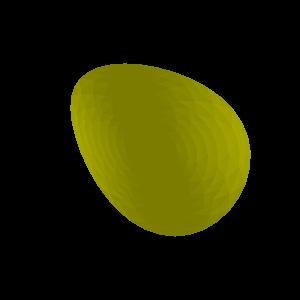

In [14]:
# Example 2.3: Circular cilynders with different shapes

S1=Cylinder(radius=36,length=100,reflectivity=1)
S2=Cylindrical(shape=Circular(radius=(50)),curvature=1/100.)
S3=Cylindrical(shape=Rectangular(size=(50,100)),curvature=1/20.)

Plot3D(S2,center=(0,0,0),size=(150,150),rot=[(pi/6,pi/6,0)],scale=2)

### 2.4 Aspheric surfaces <a class="anchor" id="2.4"></a>

*pyOpTools* allows creating aspherical surfaces. 

An aspheric surface can be written as:

$$Z=\frac{(A_x x^2+A_y y^2)}{(1+\sqrt{(1-(1+K_x)A_x^2 x^2-(1+K_y) A_y^2 y^2))}}+ poly2d()$$

The surface is defined by entering the coefficients $A_x, A_y$ and $K_x, K_y$ and the coefficients of the polynomial __*poly2d()*__ -a 2nd degree polynomial whose arguments are x,y.

```python
    sa=Aspherical(shape=Shape(parameters=(,)),Ax=A,Ay=B,Kx=C,Ky=D, poly=poly2d((a,b,c,d,e,f)))
```

>*Shape* can be either *Circular* or *Rectangular*.




>Visualize the shperical aberration;

>Idea:  Comparation of the spherical aberration

In [5]:
# Example:  poly2d in pyOpyools

p2d=poly2d((1,1,1,1,1,1))
print(p2d)


1.0+x+y+x^2+xy+y^2


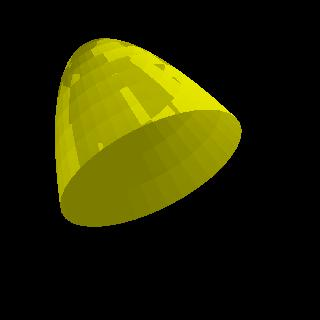

In [6]:
# Example: symmetric aspherical surface

sa=Aspherical(shape=Circular(radius=2.5),Ax=.2,Ay=.2,Kx=.1, Ky=.15, poly=poly2d((0,0,0,.5,0,.5)))
Plot3D(sa,center=(-2,-2,5),size=(8,8),rot=[(-3*pi/10,pi/4,0)],scale=40)

### 2.5 Diffraction grating <a class="anchor" id="2.5"></a>

Difraction gratings in *pyOpTools* are defined as a special kind of surface.

```python
    g=RPPMask(shape=Shape(parameters=(,)), phm=poly2d([a,b,c]),M=[p])#,0,-1,-2])
```
The unit cell of the grating is defined using *poly2d*; just the linear coefficients are useful for the grating definition. The value of *a* has not importance. *b* and *c* are the linear coefficients of the unit cell in the x & y directions. The parameter p is the difraction order to be taken into account. *Shape* can be either *Circular* or *Rectangular*.

> A diffraction grating example will be presented in section 4.

# 3. From Optical surfaces to Optical components <a class="anchor" id="3"></a>

By properly linking some optical surfaces it is possible to build several optical components using the *pyOpTools* class *Component* as follows:
```python
    P=Component(surflist=[(S1,(x1,y1,z1),(rx1,ry1,rz1)),
                          (S2,(x2,y2,z2),(rx2,ry2,rz2)),
                          (S3,(x3,y3,z3),(rx3,ry3,rz3))],material=n)            
```
    
where 

$
    \quad S_i$ is the name of the i-th optical surface
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the axis x,y & z


   $\quad$ n  is the refraction index of the optical component.
   
*pyOpTools* has a class called *material* which is meant to organize a wide catalogue of refractive indexes from several lens fabricants, among them:
- sumita
- ohara
- hoya
- corning
- hoya
- schott

To access the value of the refractive index: 

```python
    n=material.fabricant['ManofacturerTM']
```

To display all the Manofacturer's TradeMarks of the lenses availables 

```python
    material.fabricant.keys()
```

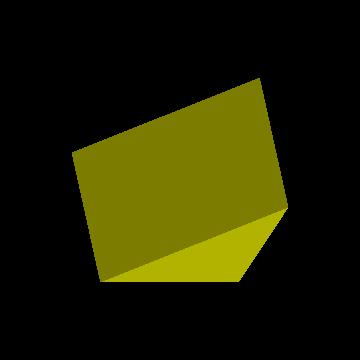

In [5]:
# Example: Building a Prisme 90°

width=50
height=50
reflectivity=1
        
a_face= Plane(shape=Rectangular(size=(width,height)))
b_face= Plane(shape=Rectangular(size=(width,height)))


h=sqrt(2.)*width
h_face= Plane (shape=Rectangular(size=(h,height)),reflectivity=0.1)
        
w2=width/2.

e1=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))
e2=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))

P=Component(surflist=[(a_face,(0,0,-width/2),(0,0,0)),
                      (b_face,(width/2,0,0),(0,pi/2,0)),
                      (h_face,(0,0,0),(0,-pi/4,0)),
                      (e1,(0,height/2,0),(pi/2,-pi/2,0)),
                      (e2,(0,height/2,0),(pi/2,-pi/2,0))
                      ],material=material.schott["BK7"])
Plot3D(P,size=(120,120),scale=3,rot=[(pi/6,pi/8,0)])

## 3.1 Predefined optical components <a class="anchor" id="31"></a>

Defining optical components surface by surface can be cumbersome. Then *pyOptools* includes several predefined components optical components including: different kinds of lenses, mirrors, stops, CCD, glass blocks, optical prismes and beamsplitters.

## 3.2 Lenses <a class="anchor" id="32"></a>

Between the predefined lenses there are ideal lenses, ideal thick lenses, spherical lenses, doublets, airspaced doublets and a catalogue of lenses.

To create an ideal lense of focal lenght *l* and an ideal thick lense of focal lenght *l* and thickness *t*

```python
    L2=IdealLens(shape=Shape(parameter=(,)),f=l)
    
    L=IdealTLens(shape=Shape(parameter=(,)), f=l, d=t)
```

To create a spherical lens

```python
    L1=SphericalLens(radius=r,curvature_s1=c1,curvature_s2=c2,thickness=t,material=n)
```
where *c1* and *c2* are the curvature radiis of the surfaces and *n* is the refraction index. The sign convention for the radius of curvature is: positive if the center of curvature is to the right of the surface, and negative if it is to the left.

To create a doublet and an air spaced doublet 

    L=Doublet(radius =r,curvature_s1 = c1, curvature_s2 = c2,
                        curvature_s3 = c3, thickness_l1 = t1, thickness_l2 = t2,
                        material_l1 = n1, material_l2 = n2)
    
    L=AirSpacedDoublet(radius = r, curvature_s1= c1,curvature_s2= c2,
                        curvature_s3 = c3, curvature_s4= c4, thickness_l1= t1,air_gap= ta, thickness_l2 = t2,
                        material_l1 =n1, material_l2 = n2)

> Puede haber problemas con la visualizacion  IdealTLenses



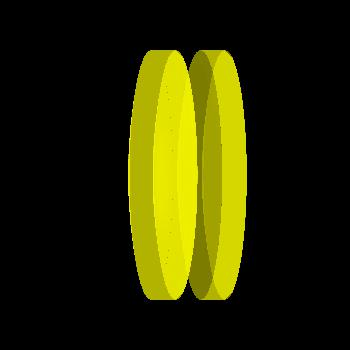

In [8]:
# Example: Visualization of an air spaced doublet

L=AirSpacedDoublet(radius = 25.,curvature_s1= 0.01,curvature_s2= 0.01,
                        curvature_s3= 0.01,curvature_s4= 0.01, thickness_l1= 5,air_gap=5 , thickness_l2= 5,
                        material_l1=1., material_l2=1.)

Plot3D(L,center=(0,0,0),size=(70,70),rot=[(0,pi/1.8,0)],scale=5)

### Catalog of lenses

The class *library* from *pyOpTools* has the possibility to add catalogues of lenses. The catalogue from *Copyright 2018, Edmund Optics Inc is included*. Other catalogues can be added and compatibility with Zemax libraries is under developpement.

To create a lens from the *Edmund Optics* catalogue:

```python
    L=library.Edmund.get("LENS_CODE")
```

The lenses codes and their characteristics can be consulted in /pyoptools/raytrace/library/Edmund/SphOptics.cmp

## 3.3 Mirrors, stops & sensors <a class="anchor" id="33"></a>

Predefined round and rectancular plane thick mirrors can be created as follows:

```python
    m=RoundMirror(radius= r, thickness = l, reflectivity = R)
    m2=RectMirror(size= (a,b,c), reflectivity = R)
```
Thin mirrors can be created as optical surfaces by adjusting the shape, size and reflectivity.

To create different shapes stops and rectangular CCD's
    
```python    
    AP=Stop(shape=Shape(parameters=(,)), ap_shape=Shape(parameters=(,)))
    c=CCD(size=(a,b))
```
> *Shape* can be be either *Circular*, *Rectangular* or *Triangular*. 

    

In appeareance, stops and CCD's look exactly like optical surfaces but when interacting with rays they show different propperties.
    

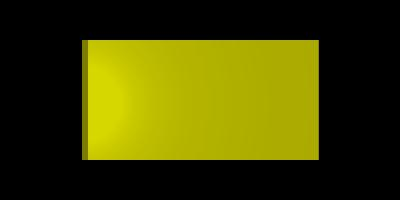

In [33]:
# Example: Visulization of a rectangular thick mirror.

m2=RectMirror(size= (5,30,60), reflectivity = 1)

Plot3D(m2,center=(0,0,30),size=(100,50),rot=[(0,pi/1.7,0)],scale=4)




## 3.4 Optical prisms & beamsplitters <a class="anchor" id="34"></a>

A glass block of refractive index *n*  and a beamsplitter whose hipotenuse reflectivity is *R*  are created as follows:

```python
    B=Block(size=(a,b,c), material=n)
    BS=BeamSplitingCube(size= l, reflectivity=R, material= n)
```

To create a right angle prism of dimensions *w* and *h* and hipotenuse of reflectivity of *R*  and a penta-prism of side *l* and refractive index *n*:

```python
    RP=RightAnglePrism(width=w,height=h,material=n,reflectivity=R)
    PP=PentaPrism(l, material= n)
```

> El pentaprisma esta abierto


CCD
RightAnglePrism, PentaPrism
Block, BeamSplitingCube
Stops


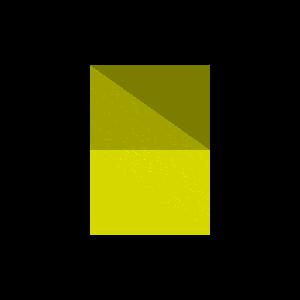

In [54]:
# Example: Visulization of a beamsplitter

BS=BeamSplitingCube(size=20, reflectivity=0.5, material=material.schott["BK8"])


Plot3D(BS,center=(0,0,0),size=(50,50),rot=[(pi/4,0,0)],scale=6)

# 4. Optical systems <a class="anchor" id="4"></a>

In order to make ray tracing *pyOpTools* uses the class *System*. A System is constitued by a set of optical components properly arranged and a light beam.

By adding a CCD anywhere in the optical path it is possible to visualize the profile of the beam as it would be captured by an optical sensor.

## 4.1 Optical systems without rays <a class="anchor" id="41"></a>

First, we consider only an optical system without rays. Rays will be added later.

```python
    S=System(complist=[(C1,(x1,y1,z1),(rx1,ry1,rz1)),(C2,(x2,y2,z2),(rx2,ry2,rz2)),(C3,(x3,y3,z3),(rx3,ry3,rz3))],n=1)
```    
where

$
    \quad C_i$ is the name of the i-th optical component
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the axis x,y & z


   $\quad$ *n*  is the refraction index of the medium in which the optical system is immersed
   






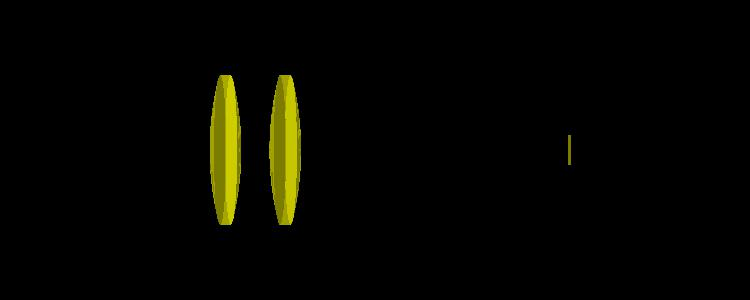

In [11]:
#Example, 2 predefined lenses and 1 CCD

#Hacer ejemplo con lentes predefinidas

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

Plot3D(S,center=(0,0,150),size=(250,100),scale=3,rot=[(0,pi/1.9,0)])

## 4.2 Rays <a class="anchor" id="42"></a>

In *pyOpTools* a ray is an object characterised by its origin coordinates (x,y,z), its direction in cartesian coordinates (ux,uy,uz), its intensity, and its wavelength in $\mu$m.

```python
    R=Ray(pos=(x,y,z),dir=(ux,uy,uz),intensity=I,wavelength=lambda)
```
several rays can be generated under the same name as a list of rays.


It is also possible to create a beam of parallel rays or a beam of rays emitted from a point source.

```python
    PB=parallel_beam_c(origin=(x,y,z),direction=(rx,ry,rz),size=(a,b),num_rays=(na,nb),wavelength=lambda,label="")

    RS=point_source_c(origin=(x,y,z),direction=(rx,ry,rz),span=(alpha,beta),num_rays=(na,nb),wavelength=labmda,label="")
```                     
where 
    
    (x,y,z) are the coordinates of the origin of the central ray of the beam 
    
    (rz,ry,rz) are the rotation angles in radians around the axis x,y & z of the central ray of the beam
    
    (a,b) is the size of the beam in perpendicular directions to the propagation axis
    
    (na,nb) number of rays in perpendicular directions to the propagation axis
    
    (alpha,beta) are the angular dimensions of the beam in perpendicular directions to the propagation axis

> Ambiguedad en la direccion de span y size cuando apunta a angulos intermedios


> by default the beam points towards the positive z axis, it has an intensity of intensity=1, wavelength=0.58929; 10 rays and an angular size of $\frac{\pi}{8}$ or linear size of 1 depending on the case.



In order to add rays as a part of the optical system we use the method *ray_add*:

```python
    S.ray_add(R)
```
The method *propagate* allows to calculate the optical path that can be later visulized using Plot3D. 

```python
    S.propagate()
```    

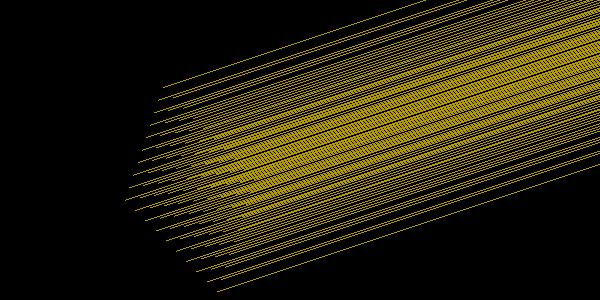

In [12]:
#Example:  visualization of a default parallel beam

S=System()
R=parallel_beam_c()

S.ray_add(R)
S.propagate()

Plot3D(S,center=(0.3,-0.4,0.6),size=(4,2),scale=150,rot=[(pi/4,pi/6,pi/4)])

An optical system in *pyOpTools* is made up by both rays and optical components. That is what is called and optical system.

In [ ]:
# Example 

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

R=point_source_c(origin=(0,0,0),direction=(0,0,0),span=(pi/8,pi/8),num_rays=(5,4),wavelength=0.45,label="")

S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])

## 4.3 Optical maps <a class="anchor" id="43"></a>

As it was mentionned, by putting a CCD across the light beam the optical map can be obtained. The optical path traversed by the rays hitting the detector can be also displayed.

Let be C a CCD:

To visualize the optical map as a spot diagram

```python
    spot_diagram(C)

```
To access the optical path traversed by the beam hitting the detector.

```python
    C.get_optical_path_map(size=(a,b))
``` 
>This method uses the optical path of the rays hitting the surface, to 
        create a optical path map of size (a,b) in the surface of the CCD. The returned value is an interpolation of the
        values obtained by the rays. The method needs at least 20 rays to perform the interpolation.
        
To get a p-order polynomial approximation ar the optical path map, and the associated error

```python
    poly,error=C.get_optical_path_map_lsq(order=p)
```
       

To get both the hit points in the CCD and the optical path.

```python
    C.get_optical_path_data()
```
>Data is displayed as a tuple X,Y,D, where X & Y contain the hit points, and 
        D containing the optical path.

([-0.099934964743107091], [0.0], [148.17172584855774])

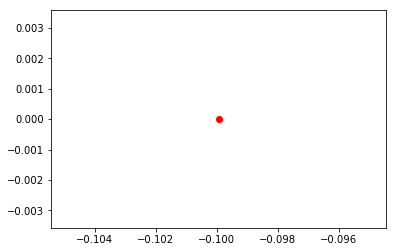

In [31]:
# Example : Recovering the information from the CCD of the example above.

spot_diagram_c(C)

C.get_optical_path_data()




In [33]:
# Example : Polynomial aproximation and visualization of the opticla map using pylab.

#C.get_optical_path_map()

poly,error=C.get_optical_path_map_lsq(order=2)
print(poly)

%pylab inline
imshow(C.get_optical_path_map())
colorbar()



LinAlgError: Singular matrix

##  4.4 Calculation involving rays <a class="anchor" id="44"></a>


```python
    p=paraxial_location(S,OA)
```


In [51]:
## From example 4...
L=IdealLens(shape=Circular(radius=(15)),f=30)
S=System(complist=[(L,(0,0,50),(0,0,0))],n=1)

OA=Ray(pos=(0,0,-10000),dir=(0,0,1),wavelength=.65)
#R=Ray(pos=(1,0,0),dir=(0,0,1),wavelength=.65)



#Plot3D(S,center=(0,0,50),size=(150,100),scale=3,rot=[(0,pi/1.9,0)])

p=paraxial_location(S,OA)

print p


(array([  0.        ,   0.        ,  80.08982036]), True)


In [3]:
#%pylab inline
p2d=poly2d([1,1,1,1,1,1])
X,Y=meshgrid(linspace(-5,5,20),linspace(-5,5,20))

print(p2d)

#Z=p2d.eval(X,Y)
#imshow(Z,extent=(-5,5,-5,5));colorbar()

NameError: name 'meshgrid' is not defined

## 5. Applications <a class="anchor" id="5"></a>

In this section more elaborated examples involving problems in optics are presented in order to show all the potential of *pyOpTools*. Often matplotlib and *NumPy* modules will be used.

- Calculate the focal lenght

- Stability of a cavity

- Lenses comparition

- Spherical aberration. Correction

- Difracrtion grating

- double Porro prism -> Binoculars

- Air spaced triplet telescope objective

- Constructing an hologram

### 4.1 Building a collimator



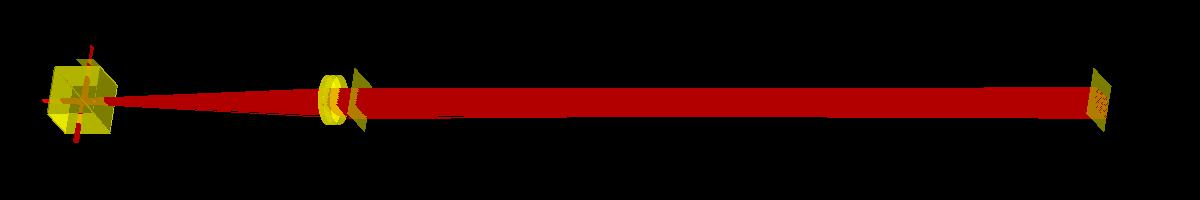

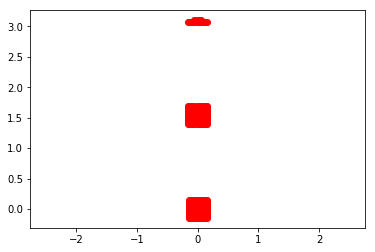

In [17]:
# Autocollimator with a plane mirror

BS=BeamSplitingCube(size=25,reflectivity=.5,material=material.schott["BK7"])
L=library.Edmund.get("32494")
M1=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=0.5),(0,0,0),(0,0,0))])
M2=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=1),(0,0,0),(0,0,0))])

C=CCD()

#Nota, hay problemas si existe una cavidad resonante
S=System(complist=[(C,(20,0,20),(0,pi/2,0)),(BS,(0,0,20),(0,0,0)),(L,(0,0,156.),(0,-pi,0)),(M1,(0,0,170),(0,0,0)),(M2,(0,0,570),(.005,0,0))],n=1.)
R=point_source_c(span=(0.06,0.06),wavelength=.65)
#0.005 rad tilted

S.ray_add(R)
S.propagate()

spot_diagram_c(C)

Plot3D(S,center=(0,0,300), size=(600,100),scale=2,rot=[(0,0,-3*pi/8),(0,3*pi/8,0)])


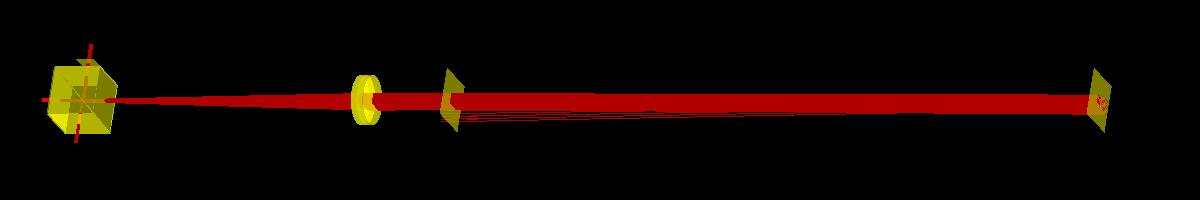

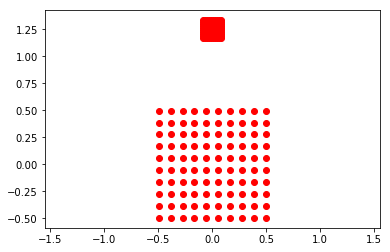

In [18]:
# Replacing the external mirror

BS=BeamSplitingCube(size=25,reflectivity=.5,material=material.schott["BK7"])
L=library.Edmund.get("32494")
M1=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=0.5),(0,0,0),(0,0,0))])
M2=Component(surflist=[(Spherical(curvature=1/1000.,shape=Rectangular((25,25)) ,reflectivity=1),(0,0,0),(0,0,0))])

C=CCD()

#Nota, hay problemas si existe una cavidad resonante
S=System(complist=[(C,(20,0,20),(0,pi/2,0)),(BS,(0,0,20),(0,0,0)),(L,(0,0,173.92009201),(0,-pi,0)),(M1,(0,0,220),(0,0,0)),(M2,(0,0,570),(0.005,0,0))],n=1.)
R=point_source_c(span=(0.03,0.03),wavelength=.65)


S.ray_add(R)
S.propagate()

spot_diagram_c(C)

Plot3D(S,center=(0,0,300), size=(600,100),scale=2,rot=[(0,0,-3*pi/8),(0,3*pi/8,0)])



In [19]:
def opsystem(lp):
    BS=BeamSplitingCube(size=25,reflectivity=.5,material=material.schott["BK7"])
    L=library.Edmund.get("32494")
    M1=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=0.5),(0,0,0),(0,0,0))])
    M2=Component(surflist=[(Spherical(curvature=1/1000.,shape=Rectangular((25,25)) ,reflectivity=1),(0,0,0),(0,0,0))])

    C=CCD()

    S=System(complist=[(C,(20,0,20),(0,pi/2,0)),(BS,(0,0,20),(0,0,0)),(L,(0,0,lp),(0,-pi,0)),(M1,(0,0,170),(0,0,0)),(M2,(0,0,570),(0.005,0,0))],n=1.)
    R=point_source_c(span=(0.03,0.03),wavelength=.65)

    S.ray_add(R)
    S.propagate()
    X,Y,Z=C.get_optical_path_data()
    
    return array(Z).std()

In [20]:
opsystem(176)

447.63513141813189

In [21]:
%pylab inline
from scipy.optimize import fmin
fmin(opsystem,173)

Populating the interactive namespace from numpy and matplotlib
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 27
         Function evaluations: 54


array([ 173.92009201])

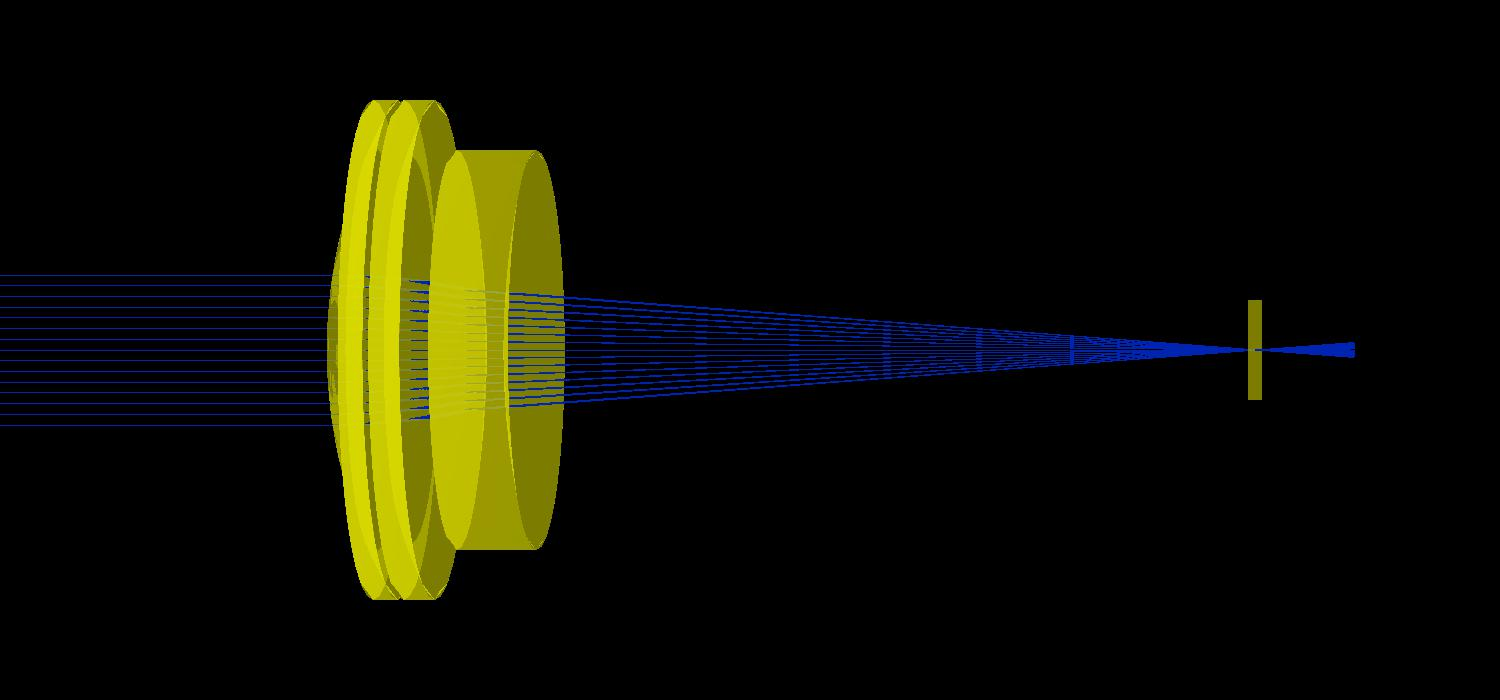

In [240]:
## Air spaced triplet telescope objective - p534 Modern optical engeneering fourth edition


L1=SphericalLens(radius=25,curvature_s1=1/50.098,curvature_s2=-1/983.420,thickness=4.500,material=material.schott["BK7"])
L2=SphericalLens(radius=25,curvature_s1=1/56.671,curvature_s2=-1/171.150,thickness=4.500,material=material.schott["BK7"])
L3=SphericalLens(radius=20,curvature_s1=-1/97.339,curvature_s2=1/81.454,thickness=3.500,material=material.schott["SF1"])


C=CCD(size=(10,10))

S=System(complist=[(L1,(0,0,100),(0,0,0)),(L2,(0,0,104.6),(0,0,0)),(L3,(0,0,114.171),(0,0,0)), (C,(0,0,191.053),(0,0,0))],n=1)

PB=parallel_beam_c(origin=(0,0,50),direction=(0,0,0),size=(15,15),num_rays=(15,15),wavelength=.45)
OA=Ray(pos=(0,0,-10000),dir=(0,0,1),wavelength=.65) # Optical axis

S.ray_add(PB)

S.propagate()
Plot3D(S,center=(0,0,140),size=(150,70),scale=10,rot=[(0,pi/2.2,0)])



In [241]:
## The fabricant also tells us to verify the raytracing we look for the focal point as the paraxial image 

spot_diagram_c(C)
p=paraxial_location(S,OA)
print p

(array([   0.        ,    0.        ,  192.09575837]), True)


In [ ]:
# 7 x 40 binocular

L1=library.Edmund.get("32935") #Achromatic doublet r= 20

RP=RightAnglePrism(width=40,height=40,material=material.schott["BK7"])



CC=CCD(size=(50,50))

S=System(complist=[(L1,(0,0,100),(0,0,0)), (RP,(0,0,250),(-pi/2,pi/2,0)), (RP,(0,-50,250),(pi/2,-pi/2,0)), (CC,(0,-50,320),(0,0,0))],n=1)

PB=parallel_beam_c(origin=(0,0,0),direction=(0,0,0),size=(25,25),num_rays=(30,30),wavelength=.55)
#OA=Ray(pos=(0,0,100),dir=(0,0,10),intensity=100, wavelength=.55) # Optical axis
#E=Ray(pos=(0,-50,351.5),dir=(0,0,10),wavelength=.55)
#OA.add_child(E)


S.ray_add(PB)
#S.ray_add(OA)
#S.ray_add(E)

S.propagate()

Plot3D(S,center=(0,-30,200),size=(350,150),scale=20,rot=[(0,pi/2.2,0)])



#Found focal plane & look for the right eye-piece




In [231]:
p=E.optical_path_parent()

print p

256.422015435


In [220]:


L1=library.Edmund.get("32935") #Achromatic doublet r= 20
S=System(complist=[(L1,(0,0,0),(0,0,0))],n=1)


OA=Ray(pos=(0,0,-10000),dir=(0,0,10),intensity=100, wavelength=.65) # Optical axis



p=paraxial_location(S,OA)
print p



(array([   0.        ,    0.        ,  257.10890441]), True)
